In [11]:
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
#read data
df = pd.read_csv('./laptop-sales.csv')

In [12]:

# Convert 'Date' column to datetime objects
df['Date'] = pd.to_datetime(df['Date'], format='%b-%y', errors='coerce')

# Handle invalid dates (if any)
sales_df = df.dropna(subset=['Date'])


In [ ]:
# Group sales data by year
annual_sales = sales_df.groupby(sales_df['Date'].dt.year)['Sales (Thousands $)'].sum()

In [22]:
df =sales_df 
# Extract the quarter from the date
df['Quarter'] = df['Date'].dt.quarter

# Group by quarter and sum sales
quarterly_sales = df.groupby('Quarter')['Sales (Thousands $)'].sum().reset_index()

quarterly_sales

,Quarter,Sales (Thousands $)
0,1,22900
1,2,20800
2,3,28299
3,4,30100


In [30]:
df['Monthly'] = df['Date'].dt.to_period('M')
# Group by month and sum sales
monthly_sales_2 = df.groupby('Date')['Sales (Thousands $)'].sum().reset_index()

In [ ]:
# Group data by month, ignoring years
df['Month'] = df['Date'].dt.month_name()
monthly_sales = df.groupby('Month')['Sales (Thousands $)'].sum()

# Sort months in calendar order
sorted_monthly_sales = monthly_sales.reindex([
    'January', 'February', 'March', 'April', 'May', 'June', 
    'July', 'August', 'September', 'October', 'November', 'December'
])

# Display results
print(sorted_monthly_sales)

Month
January       4178
February      9850
March         8872
April         6601
May           4180
June         10019
July         12582
August        8607
September     7110
October      13848
November      8934
December      7318
Name: Sales (Thousands $), dtype: int64


In [ ]:
# Group data by month and sum sales
monthly_sales = df.groupby(df['Date'].dt.to_period('M'))['Sales (Thousands $)'].sum()


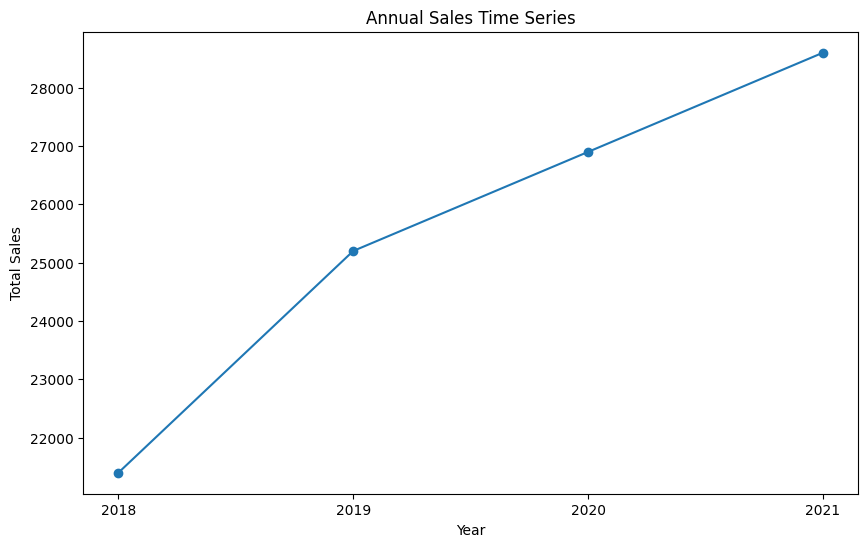

In [23]:
# Create the line chart
plt.figure(figsize=(10, 6))
plt.plot(annual_sales.index, annual_sales.values, marker='o', linestyle='-')
plt.title('Annual Sales Time Series')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.grid(False)
plt.xticks(annual_sales.index)  # Ensure all years are shown on the x-axis
plt.show()

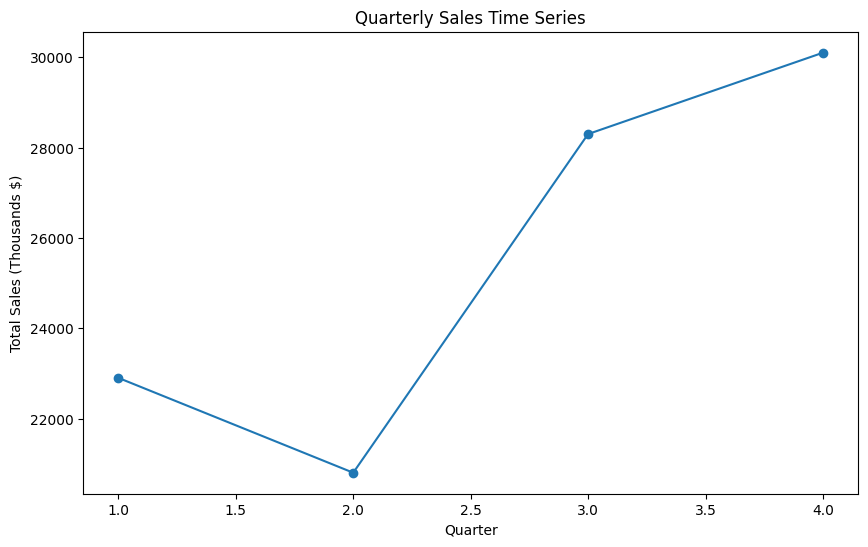

In [25]:
# Create the line chart
plt.figure(figsize=(10, 6))
plt.plot(quarterly_sales['Quarter'], quarterly_sales['Sales (Thousands $)'], marker='o', linestyle='-')
# Customize the chart
plt.title('Quarterly Sales Time Series')
plt.xlabel('Quarter')
plt.ylabel('Total Sales (Thousands $)')
plt.grid(False)
 

In [36]:
sorted_monthly_sales
# Convert the sorted series to a DataFrame
monthly_sales_df = sorted_monthly_sales.reset_index()
monthly_sales_df.columns = ['Month', 'Total Sales (Thousands $)']

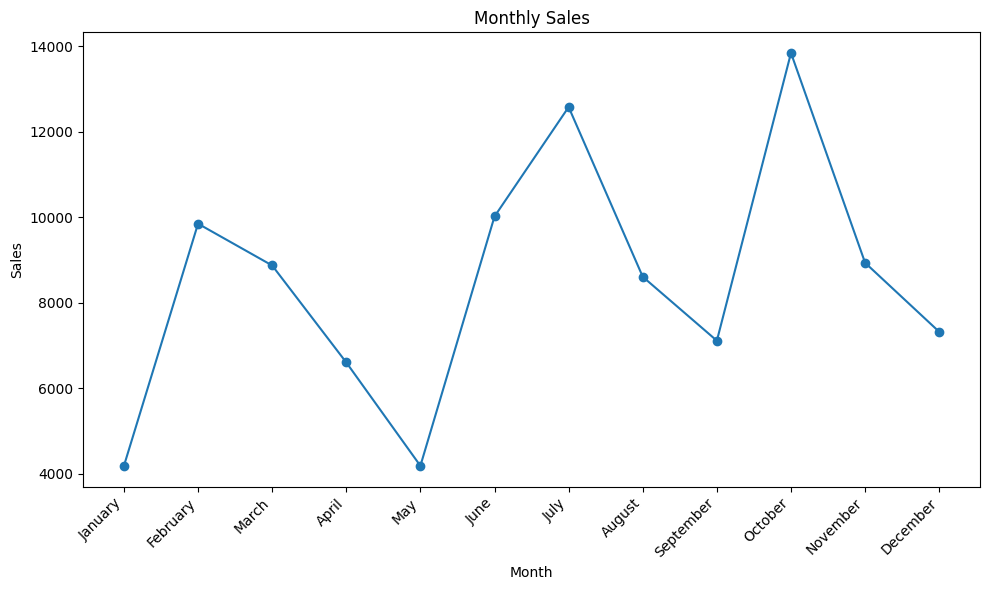

In [40]:
# Create the bar plot
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
plt.plot(monthly_sales_df['Month'], monthly_sales_df['Total Sales (Thousands $)'], marker='o', linestyle='-') 
# Customize the plot
plt.xlabel("Month")
plt.ylabel("Sales")
plt.title("Monthly Sales")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping

# Show the plot
plt.show()

# Insights:

- There was a steep drop in sales between October and December
- High increase in sales between quatre 2 to 4
- Sales gradually increased over the years